# Sistemas Inteligentes

## Laboratório 2 - Classificação

Neste laboratório serão introduzidos: **Linear Discriminant Analysis (LDA)**, **Support Vector Machine (SVM)** e **Artificial Neural Networks (ANN)**.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [ ]:
from sklearn.datasets import load_digits
digits_dataset = load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

Utilize a função **reshape** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [ ]:
## Atribuindo digits_img ao objeto images: ##

digits_img = digits_dataset.images

## Aplicando a função reshape: ##

digits = digits_img.reshape(digits_img.shape[0], digits_img.shape[1] * digits_img.shape[2])

## Atribuindo o objeto target à digits_target: ##

digits_target = digits_dataset.target


#### Divisão dos dados em grupos para treinamento e teste.

Importe e utilize a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [ ]:
## Importando a função train_test_split: ##

from sklearn.model_selection import train_test_split

## Separando o dataset conjuntos de treino e teste: ##

x_train, x_test, y_train, y_test = train_test_split(digits, digits_target, test_size = 0.25)

### Linear Discriminant Analysis (LDA)

#### Treinamento

Importe o classificador do LDA, que é uma função chamada **LinearDiscriminantAnalysis** do pacote **discriminant_analysis**, que faz parte da biblioteca **sklearn**. Então crie o classificador com o nome **LDA** atribundo a ele a função **LinearDiscriminantAnalysis** utilizando **solver='lsqr'**).

Treine o classificador **LDA** por meio de sua própria função **fit()**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [ ]:
## Importando o classificador LDA: ##

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Atribuindo a função ao LDA para o treinamento: ##

LDA = LinearDiscriminantAnalysis(solver = 'lsqr').fit(x_train, y_train)

#### Classificação e Resultados

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **LDA**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred_LDA**.

In [ ]:
y_pred_LDA = LDA.predict(x_test)

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**, então imprima a acurácia do classificador lda e sua confusion matrix.

In [ ]:
## Importando as funções accuracy_score e confusion_matrix: ##

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Imprimindo acurácia e a matriz de confusão: ##

print(f'Acurácia: ', round(accuracy_score(y_test, y_pred_LDA) * 100,2),'%')
confusion_matrix(y_test, y_pred_LDA)

Acurácia:  96.22 %


array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  3],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 45]])

### Support Vector Machine (SVM)

#### Treinamento

Importe a função **SVC**, pertencente ao pacote **SVM** da biblioteca **sklearn**, então crie o classificador chamado **SVM**, análogo ao que foi feito com o LDA anteriormente. Utilize os parâmetros **C=1.0**, **kernel='poly'** e **degree=3**.

Então, treine o classificador **SVM** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [ ]:
## Importando a função SVC: ##

from sklearn.svm import SVC

## Criando o classificador SVC: ##

SVM = SVC(C = 1.0, kernel ='poly', degree = 3).fit(x_train, y_train)

#### Classificação e Resultados

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **SVM** e armazene os resultados em **y_pred_SVM**.

Na mesma célula, verifique a acurácia do classificador **SVM** por meio da função **accuracy_score** e mostre a matriz de confusão do classificador **SVM** utilizando a função **confusion_matrix**.

In [ ]:
## Classificando os dados de entrada para teste: ##

y_pred_SVM = SVM.predict(x_test)

## Imprimindo a acurácia e a matriz de confusão: ##

print(f'Acurácia: ', round(accuracy_score(y_test, y_pred_SVM) *100, 2),'%')
confusion_matrix(y_test, y_pred_SVM)

Acurácia:  98.44 %


array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 45]])

### Artificial Neural Networks (ANN)

#### Treinamento

Importe a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então crie o classificador **ANN** usando a função importada com os parâmetros **solver='lbfgs'** e **hidden_layer_sizes=(50)**.

Depois, treine o classificador usando os dados de entrada e saída de treinamento.

In [ ]:
## Importando a função MLPClassifier: ##

from sklearn.neural_network import MLPClassifier

## Criando o classificador ANN: ##

ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50)).fit(x_train, y_train)

#### Classificação e Resultados

Faça a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprima a acurácia e a matriz de confusão dessa classificação.

In [ ]:
## Classificando os dados de entrada para teste: ##

y_pred_ANN = ANN.predict(x_test)

## Imprimindo a acurácia e a matriz de confusão: ##

print(f'Acurácia: ', round(accuracy_score(y_test, y_pred_ANN) *100, 2), '%')
confusion_matrix(y_test, y_pred_ANN)

Acurácia:  97.33 %


array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  2, 41,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  1],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 45]])

#### Análise para diferentes quantidades de neurônios

Faça, iterativamente, com que seja treinada e testada uma rede neural de uma camada, utilizando uma quantidade crescente de neurônios, indo de 1 a 50. Armazene o valor da acurácia para cada iteração, então imprima as seguintes estatísticas sobre a acurácia: mínima, máxima, média, mediana, moda, variância e desvio padrão.

In [ ]:
## Importando as biblitecas: ##

import numpy as np
import statistics
from scipy.stats import mode

# Calculando a acurácia variando a quantidade de neurônios de 1 a 50: ##

acuracia = []
neuronio_maximo = 50

for neuronio in range(1, neuronio_maximo):
  ANN_seq = MLPClassifier(hidden_layer_sizes = (neuronio), solver = 'lbfgs').fit(x_train, y_train)
  ANN_y_pred_seq = ANN_seq.predict(x_test)
  acuracia.append(accuracy_score(y_test, ANN_y_pred_seq))

## Imprimindo as estatísticas da acurácia: ##

print(f'Mínimo: ', round(min(acuracia), 2))
print(f'Máximo: ', round(max(acuracia), 2))
print(f'Média: ', round(statistics.mean(acuracia), 2))
print(f'Mediana: ', round(statistics.median(acuracia), 2))
print(f'Moda: ', round(mode(acuracia).mode[0], 2))
print(f'Var: ', round(np.var(acuracia), 2))
print(f'Desvio Padrao: ', round(np.std(acuracia), 2))

Mínimo:  0.07
Máximo:  0.97
Média:  0.85
Mediana:  0.95
Moda:  0.95
Var:  0.05
Desvio Padrao:  0.23


Utilizando subplots, gere o gráfico da acurácia do classificador para cada quantidade de neurônios na camada da rede neural e o gráfico do erro, considerando como o erro o quadrado da diferença entre as acurácias das últimas duas iterações.

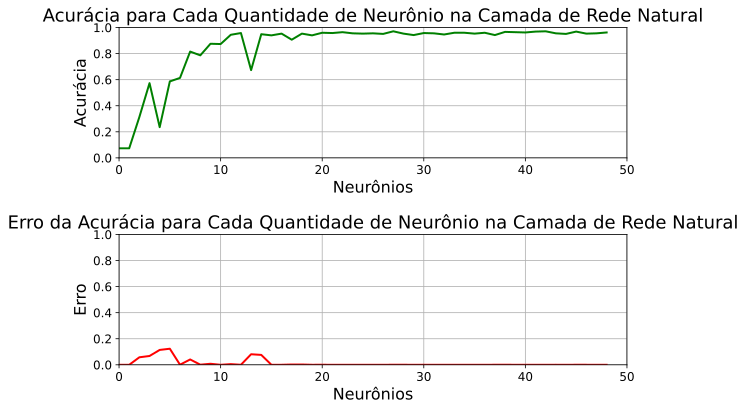

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)
quant_acuracia = len(acuracia)

erro_acuracia = [0]
media_acuracia = np.mean(acuracia)

for i in range(1, quant_acuracia):
  erro_acuracia.append((acuracia[i] - acuracia[i-1]) **2)

## Plotando o gráfico da acurácia: ##
plt.subplot(211)
plt.plot(acuracia, 'g', linewidth = 2.0)
plt.grid()
plt.title('Acurácia para Cada Quantidade de Neurônio na Camada de Rede Natural')
plt.xlim(0, neuronio_maximo)
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.xlabel('Neurônios')

## Plotando o gráfico do erro: ##

plt.subplot(212)
plt.plot(erro_acuracia, 'r', linewidth = 2.0)
plt.grid()
plt.title('Erro da Acurácia para Cada Quantidade de Neurônio na Camada de Rede Natural')
plt.xlim(0, neuronio_maximo)
plt.ylim(0, 1)
plt.ylabel('Erro')
plt.xlabel('Neurônios')
plt.tight_layout()

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)